In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft
plt.rcParams['text.usetex'] = True

<>:58: SyntaxWarning: invalid escape sequence '\e'
<>:58: SyntaxWarning: invalid escape sequence '\e'
/tmp/ipykernel_29222/2517832077.py:58: SyntaxWarning: invalid escape sequence '\e'
  plot_spectrum(axs[4, 1], freq, eps_spec, "Spectrum ($\epsilon_i$)")


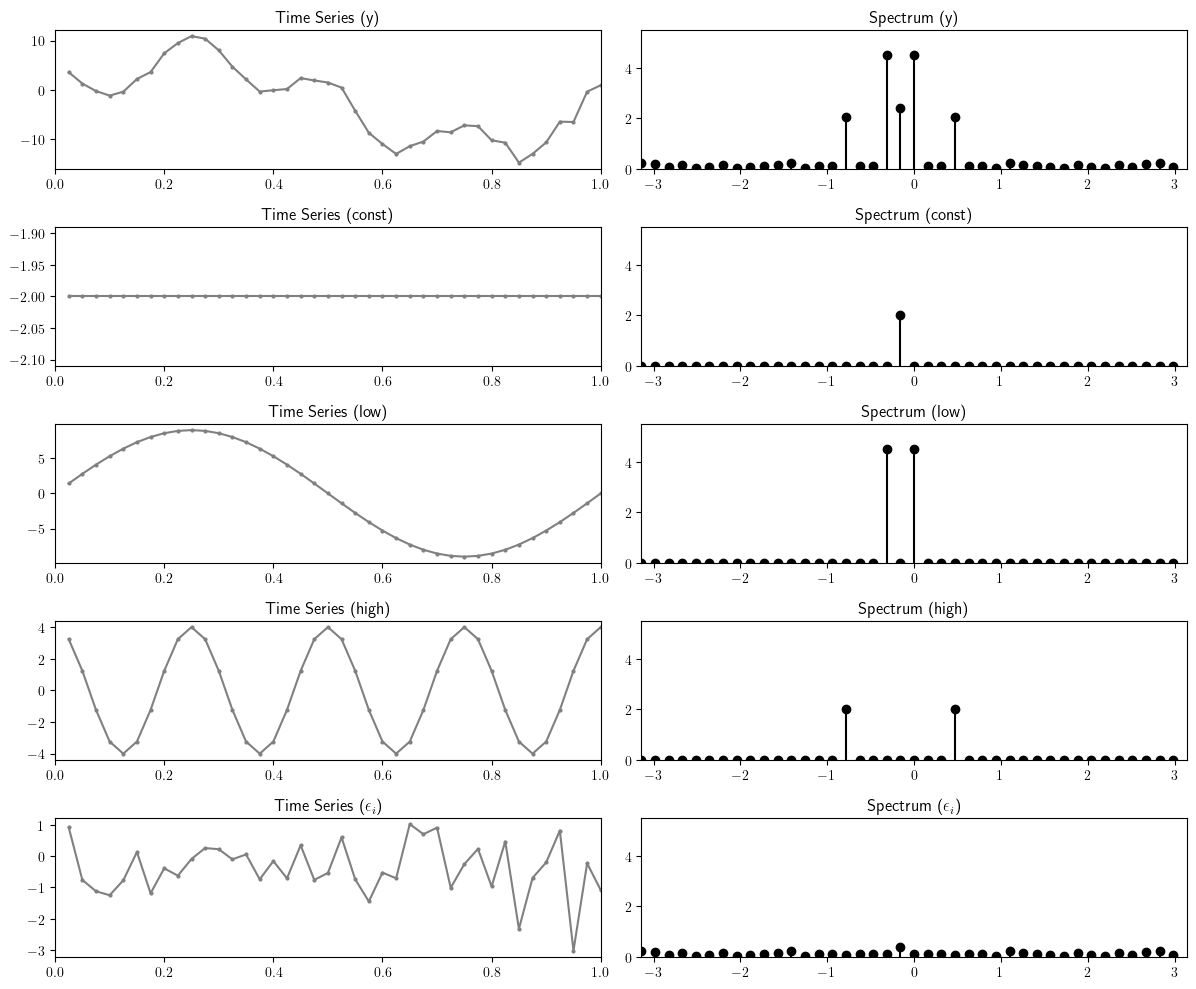

In [12]:
# Define the function to compute the Fourier Transform and spectra
def spec(y):
    n = len(y)
    spec = np.abs(fft(y)) / n
    omega = np.arange(n) / n
    if n % 2 == 0:
        m = (n // 2) + 1
    else:
        m = (n - 1) // 2 + 1
    spec = np.concatenate((spec[m:], spec[:m]))
    omega = np.concatenate((omega[m:] - 1, omega[:m])) - 1 / n
    return omega * 2 * np.pi, spec

# Define the time series
t = np.arange(1, 41) / 40
eps = np.random.normal(size=40)
const = -2 + t * 0
low = 9 * np.sin(2 * np.pi * t)
high = 4 * np.cos(4 * 2 * np.pi * t)
ytrue = const + low + high
y = ytrue + eps

# Compute spectra
freq, y_spec = spec(y)
_, const_spec = spec(const)
_, low_spec = spec(low)
_, high_spec = spec(high)
_, eps_spec = spec(eps)

# Plotting
fig, axs = plt.subplots(5, 2, figsize=(12, 10))

# Time series and their spectra
def plot_series(ax, t, series, title=""):
    ax.plot(t, series, 'gray', marker='o', markersize=2)
    ax.set_title(title)
    ax.set_xlim(0, 1)  # Setting x-axis limits

def plot_spectrum(ax, freq, spectrum, title=""):
    ax.stem(freq, spectrum, 'k-', basefmt=" ", markerfmt='ko')
    ax.set_ylim(0, 5.5)
    ax.set_xlim(-np.pi, np.pi)  # Setting x-axis limits for frequency
    ax.set_title(title)

plot_series(axs[0, 0], t, y, "Time Series (y)")
plot_spectrum(axs[0, 1], freq, y_spec, "Spectrum (y)")

plot_series(axs[1, 0], t, const, "Time Series (const)")
plot_spectrum(axs[1, 1], freq, const_spec, "Spectrum (const)")

plot_series(axs[2, 0], t, low, "Time Series (low)")
plot_spectrum(axs[2, 1], freq, low_spec, "Spectrum (low)")

plot_series(axs[3, 0], t, high, "Time Series (high)")
plot_spectrum(axs[3, 1], freq, high_spec, "Spectrum (high)")

plot_series(axs[4, 0], t, eps, r"Time Series ($\epsilon_i$)")
plot_spectrum(axs[4, 1], freq, eps_spec, "Spectrum ($\epsilon_i$)")

plt.tight_layout()
plt.show()

This example demonstrates the generation of a time series data and its Fourier transform to analyze the frequency spectrum. The time series data consists of various components: a constant, a low-frequency sine wave, a high-frequency cosine wave, and noise. The Fourier transform is used to visualize both the time domain and frequency domain representations of each component.

First, we generate a time series data of 40 points. This time series data is composed of the following components: a constant component, $\text{const} = -2$; a low-frequency sine wave component, $\text{low} = 9 \sin\left(2 \pi t_i\right)$; a high-frequency cosine wave component, $\text{high} = 4 \cos\left(8 \pi t_i\right)$; and a noise component, $\epsilon_i$, which is normally distributed random noise with mean 0 and standard deviation 1. The entire time series data $y$ is expressed as the sum of these components:

$$
y_i = \text{const} + \text{low}_i + \text{high}_i + \epsilon_i
$$

where $t_i$ represents the discrete time steps.

The Fourier transform is used to convert the time-domain representation of the time series data into the frequency domain, revealing the magnitude of each frequency component. The frequency spectrum is a collection of these magnitude values for each frequency.

Each row of the figure contains two graphs. The left graph shows the time-domain representation of the time series data, and the right graph shows the frequency spectrum obtained from the Fourier transform.

In the first row, the left graph shows the entire time series data $y$ plotted against time. The gray solid line represents the actual data $y$, which is the sum of the constant, low-frequency sine wave, high-frequency cosine wave, and noise components. The dotted line represents the ideal data $y_{\text{true}}$, without the noise:

$$
y_{\text{true}, i} = \text{const} + \text{low}_i + \text{high}_i
$$

The right graph shows the frequency spectrum of the entire time series data $y$. It reveals the mixed frequency components present in the data.

In the second row, the left graph shows the constant component of the time series data plotted against time. The graph remains at a constant value over time. The right graph shows the frequency spectrum of the constant component. It shows a large value at frequency 0 and near-zero values at other frequencies, indicating that the constant component is equivalent to the DC component (0 Hz) in the frequency domain.

In the third row, the left graph shows the low-frequency sine wave component of the time series data plotted against time. It has a long periodic sine wave shape:

$$
\text{low}_i = 9 \sin\left(2 \pi t_i\right)
$$

The right graph shows the frequency spectrum of the low-frequency sine wave component. It shows large values at specific low frequencies, with near-zero values at other frequencies.

In the fourth row, the left graph shows the high-frequency cosine wave component of the time series data plotted against time. It has a short periodic cosine wave shape:
